In [27]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import json
from cv19gm.cv19sim import CV19SIM
import cv19gm.utils.cv19functions as cv19functions
import pandas as pd

# Simulation

# SEIRMETA

In [5]:
dictToSend = {
    "model2": {
        "model": {
            "name": "Example",
            "id": "1323455",
            "model": "SEIRMETA",
            "compartments": [
                "S",
                "E",
                "I",
                "R"
            ],
            "EDOs": True,
            "RBM": False,
            "RBM_N": 1
        },
        "data": {
            "datafile": False,
            "importdata": False,
            "initdate": "",
            "country": "USA",
            "state": "",
            "county": "",
            "healthservice": "",
            "loc_name": "",
            "geo_topology": "meta"
        },
        "parameters": {
            "static": {
                "t_init": 0,
                "t_end": 500,
                "mu": [
                    1.0,
                    0.8,
                    1.2
                ],
                "pI_det": 1,
                "k_I": 0,
                "k_R": 0,
            },
            "dynamic": {
                "beta": [
                    0.2,
                    0.15,
                    0.125
                ],
                "alpha": [
                    1,
                    1,
                    1
                ],
                "Phi": False,
                "tE_I": 5.0,
                "tI_R": 10.0,
                "rR_S": 0
            }
        },
        "initialconditions": {
            "I": [
                1000,
                0,
                1500
            ],
            "I_d": [
                100,
                0,
                150
            ],
            "I_ac": [
                4500,
                9000,
                6500
            ],
            "population": [
                100000,
                200000,
                150000
            ],
            "R": [
                5000,
                10000,
                7500
            ],
            "E": False,
            "E_d": False
        }
    }
} 

In [19]:
res = requests.post('http://localhost:5003/simulate_meta', json=dictToSend)
#print('response from server:',res.text)
dictFromServer = res.json()

In [24]:
response = json.loads(dictFromServer['results']['model2'])

In [28]:
# Working with pandas dataframe
responsedf = pd.DataFrame(response)

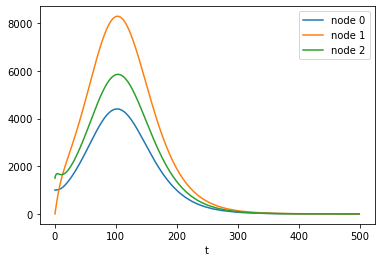

In [35]:
ax = plt.gca()
for i in range(len(responsedf['node'].drop_duplicates())):
    responsedf.loc[responsedf['node']==i].plot(x = 't',y='I',ax=ax,label='node '+str(i))